In [228]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display

In [229]:
max_baseline=4
nant=4
width=256
center_position=[128,128]


In [230]:


x0 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
y0 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
x1 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
y1 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
x2 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
y2 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
x3 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)
y3 = Variable(torch.randn(1,dtype=torch.complex64)*max_baseline, requires_grad=True)


In [231]:


its=100
ratio=[]
for step in range(its):

    uvs = torch.zeros((width, width), dtype=torch.complex64)

    baselines = [
        [ant_pos[0][0] - ant_pos[1][0], ant_pos[0][1] - ant_pos[1][1]],
        [ant_pos[0][0] - ant_pos[2][0], ant_pos[0][1] - ant_pos[2][1]],
        [ant_pos[0][0] - ant_pos[3][0], ant_pos[0][1] - ant_pos[3][1]],
        [ant_pos[1][0] - ant_pos[0][0], ant_pos[1][1] - ant_pos[0][1]],
        [ant_pos[1][0] - ant_pos[2][0], ant_pos[1][1] - ant_pos[2][1]],
        [ant_pos[1][0] - ant_pos[3][0], ant_pos[1][1] - ant_pos[3][1]],
        [ant_pos[2][0] - ant_pos[0][0], ant_pos[2][1] - ant_pos[0][1]],
        [ant_pos[2][0] - ant_pos[1][0], ant_pos[2][1] - ant_pos[1][1]],
        [ant_pos[2][0] - ant_pos[3][0], ant_pos[2][1] - ant_pos[3][1]],
        [ant_pos[3][0] - ant_pos[0][0], ant_pos[3][1] - ant_pos[0][1]],
        [ant_pos[3][0] - ant_pos[1][0], ant_pos[3][1] - ant_pos[1][1]],
        [ant_pos[3][0] - ant_pos[2][0], ant_pos[3][1] - ant_pos[2][1]],
    ]

    u_indices = [
        int((baselines[0][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][0] + max_baseline) * width / (2 * max_baseline)),
    ]

    v_indices = [
        int((baselines[0][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][1] + max_baseline) * width / (2 * max_baseline)),
    ]


    uvs[u_indices,v_indices]=1

    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uvs)))

    radius = 1  # Radius of the circular mask

    # Create a circular mask
    mask = torch.zeros((width, width), dtype=torch.bool, )
    cy, cx = center_position
    y, x = torch.meshgrid(torch.arange(width), torch.arange(width))
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    masked_uv = sky_image * mask
    outofmask=sky_image-masked_uv

    nt_ratio=(torch.abs(torch.sum(torch.abs(outofmask))))/(torch.abs(torch.sum(torch.abs(masked_uv))))
    ratio.append(nt_ratio)
    
    
    ratio;


In [232]:
nt_ratio

tensor(6137.8784)

In [233]:
its=100
    ratio=[]
    for step in range(its):

    uvs = torch.zeros((width, width), dtype=torch.complex64)

    baselines = [
        [ant_pos[0][0] - ant_pos[1][0], ant_pos[0][1] - ant_pos[1][1]],
        [ant_pos[0][0] - ant_pos[2][0], ant_pos[0][1] - ant_pos[2][1]],
        [ant_pos[0][0] - ant_pos[3][0], ant_pos[0][1] - ant_pos[3][1]],
        [ant_pos[1][0] - ant_pos[0][0], ant_pos[1][1] - ant_pos[0][1]],
        [ant_pos[1][0] - ant_pos[2][0], ant_pos[1][1] - ant_pos[2][1]],
        [ant_pos[1][0] - ant_pos[3][0], ant_pos[1][1] - ant_pos[3][1]],
        [ant_pos[2][0] - ant_pos[0][0], ant_pos[2][1] - ant_pos[0][1]],
        [ant_pos[2][0] - ant_pos[1][0], ant_pos[2][1] - ant_pos[1][1]],
        [ant_pos[2][0] - ant_pos[3][0], ant_pos[2][1] - ant_pos[3][1]],
        [ant_pos[3][0] - ant_pos[0][0], ant_pos[3][1] - ant_pos[0][1]],
        [ant_pos[3][0] - ant_pos[1][0], ant_pos[3][1] - ant_pos[1][1]],
        [ant_pos[3][0] - ant_pos[2][0], ant_pos[3][1] - ant_pos[2][1]],
    ]

    u_indices = [
        int((baselines[0][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][0] + max_baseline) * width / (2 * max_baseline)),
    ]

    v_indices = [
        int((baselines[0][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][1] + max_baseline) * width / (2 * max_baseline)),
    ]


    uvs[u_indices,v_indices]=1

    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uvs)))

    radius = 1  # Radius of the circular mask

    # Create a circular mask
    mask = torch.zeros((width, width), dtype=torch.bool, )
    cy, cx = center_position
    y, x = torch.meshgrid(torch.arange(width), torch.arange(width))
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    masked_uv = sky_image * mask
    outofmask=sky_image-masked_uv

    nt_ratio=(torch.abs(torch.sum(torch.abs(outofmask))))/(torch.abs(torch.sum(torch.abs(masked_uv))))
    ratio.append(nt_ratio)
    
    
    ratio;

IndentationError: unexpected indent (399721648.py, line 2)

In [ ]:






# Optimization loop
for step in range(steps):
    # Compute area

    # Create the tensor
    sky = torch.zeros((width, width), dtype=torch.complex64, requires_grad=True)
    uvs = torch.zeros((width, width), dtype=torch.complex64, requires_grad=True)

    baselines = [
        [ant_pos[0][0] - ant_pos[1][0], ant_pos[0][1] - ant_pos[1][1]],
        [ant_pos[0][0] - ant_pos[2][0], ant_pos[0][1] - ant_pos[2][1]],
        [ant_pos[0][0] - ant_pos[3][0], ant_pos[0][1] - ant_pos[3][1]],
        [ant_pos[1][0] - ant_pos[0][0], ant_pos[1][1] - ant_pos[0][1]],
        [ant_pos[1][0] - ant_pos[2][0], ant_pos[1][1] - ant_pos[2][1]],
        [ant_pos[1][0] - ant_pos[3][0], ant_pos[1][1] - ant_pos[3][1]],
        [ant_pos[2][0] - ant_pos[0][0], ant_pos[2][1] - ant_pos[0][1]],
        [ant_pos[2][0] - ant_pos[1][0], ant_pos[2][1] - ant_pos[1][1]],
        [ant_pos[2][0] - ant_pos[3][0], ant_pos[2][1] - ant_pos[3][1]],
        [ant_pos[3][0] - ant_pos[0][0], ant_pos[3][1] - ant_pos[0][1]],
        [ant_pos[3][0] - ant_pos[1][0], ant_pos[3][1] - ant_pos[1][1]],
        [ant_pos[3][0] - ant_pos[2][0], ant_pos[3][1] - ant_pos[2][1]],
    ]

    u_indices = [
        int((baselines[0][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][0] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][0] + max_baseline) * width / (2 * max_baseline)),
    ]

    v_indices = [
        int((baselines[0][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[1][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[2][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[3][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[4][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[5][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[6][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[7][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[8][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[9][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[10][1] + max_baseline) * width / (2 * max_baseline)),
        int((baselines[11][1] + max_baseline) * width / (2 * max_baseline)),
    ]


    uvs[u_indices,v_indices]=1

    mask_h = torch.zeros_like(uvs, dtype=torch.complex64)
    mask_h[u_indices, v_indices] = 1
    uvs_updated = uvs + mask_h

    sky_image = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(uvs_updated)))


    radius = 1  # Radius of the circular mask

    # Create a circular mask
    mask = torch.ones((width, width), dtype=torch.complex64)
    cy, cx = center_position
    y, x = torch.meshgrid(torch.arange(width), torch.arange(width))
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    masked_uv = sky_image * mask
    outofmask=sky_image-masked_uv

    nt_ratio=(torch.abs(torch.sum(torch.abs(outofmask))))/(torch.abs(torch.sum(torch.abs(masked_uv))))

    loss = -(nt_ratio)
    
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()

    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}') # Prints a value for loss function once every hundred iterations


    



RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
nt_ratio

tensor(3479.2715, grad_fn=<DivBackward0>)

In [ ]:
uvs_updated.is_leaf

False

In [ ]:
print("sky_image requires_grad:", uvs_updated.requires_grad)  # Should be True
print("sky_image grad_fn:", uvs_updated.grad_fn)

sky_image requires_grad: True
sky_image grad_fn: <AddBackward0 object at 0x28c70f8e0>


In [ ]:
loss

tensor(-10346.1709, grad_fn=<NegBackward0>)

In [ ]:
s

tensor([0.4010], requires_grad=True)

In [ ]:
print(loss.grad)

None


/var/folders/3l/010grc4n2y9f8dnbqyp20m0w0000gn/T/ipykernel_52511/2657634666.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(loss.grad)


In [ ]:
print(loss.grad)

None


/var/folders/3l/010grc4n2y9f8dnbqyp20m0w0000gn/T/ipykernel_52511/2657634666.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(loss.grad)


In [ ]:
mask[128,128]

tensor(True)

In [ ]:
nt_ratio

tensor(10346.1709, grad_fn=<DivBackward0>)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

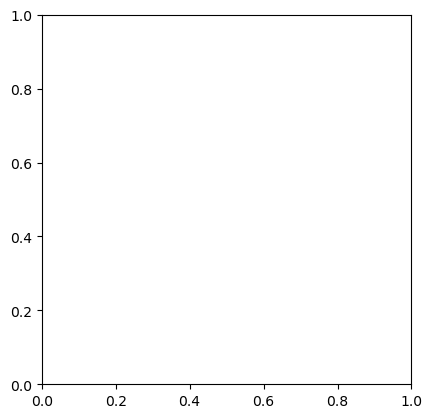

In [ ]:
images = (torch.abs(sky_image))
plt.imshow(images)
plt.show()